# Instalação das bibliotecas

In [1]:
# Framework portátil para testes em aplicativos web
#!pip install selenium

# Bibliotecas para criação de gráficos
#!pip install matplotlib
#!pip install seaborn

# Bibliotecas para manipulação de tabelas
#!pip install pandas
#!pip install openpyxl

# Criação do Prompt

In [2]:
# Biblioteca gráfica

from tkinter import *
from tkinter import messagebox

import re

# Nomeação dos campos da janela

fields = ('Email', 'Produto', 'Valor pretendido')
infos = []

# Validação dos campos e inserção dos dados salvos

def validateFields(fields):
    emailRegex = '^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'

    if not re.search(emailRegex, fields["Email"].get()):
        message = "O email '" + fields["Email"].get() + "' é inválido!"
        messagebox.showerror(title="Email inválido", message=message)
        return False
    
    try: float(fields["Valor pretendido"].get())
    except ValueError:
        message = "O valor pretendido '" + fields["Valor pretendido"].get() + "' não é um número!"
        messagebox.showerror(title="Valor inválido", message=message)
        return False
    
    return True

# Tratamento dos dados salvos

def search(root, fields):
    if not validateFields(fields): return
    
    with open("info.txt", "w") as arquivo:
        arquivo.write(fields["Email"].get() + "\n")
        arquivo.write(fields["Produto"].get() + "\n")
        arquivo.write(fields["Valor pretendido"].get() + "\n")
        root.destroy()
    
# Criação dos campos da janela
    
def enableEntry(ent):
    ent.config(state=NORMAL)
        
def makeform(root, fields):
    entries = {}
    
    for i, field in enumerate(fields):
        row = Frame(root)
        lab = Label(row, width=18, text=field+": ", anchor='w', font="Helvetica 12 bold")
        ent = Entry(row, borderwidth=5, disabledforeground="black", relief=FLAT)
        editBtn = Button(row, text = 'Editar', command =(lambda e = ent: enableEntry(e)), 
        padx = 15, pady = 5, bd = 0, fg = '#4A8DF8', activebackground="#4A8DF8",  activeforeground = "white", font="Helvetica 12 bold", cursor="hand2")
        
        try:
            with open("info.txt", "r") as arquivo:
                for info in arquivo:
                    infos.append(info[:-1])
        except IOError: pass
        
        if infos: 
            ent.insert(0, infos[i])
            ent.config(state=DISABLED)

        
        row.pack(side = TOP, fill = X, padx = 5 , pady = 5)
        lab.pack(side = LEFT)
        if infos: editBtn.pack(side = RIGHT, expand = True, fill = BOTH, padx = 10)
        ent.pack(side = RIGHT, expand = True, fill = BOTH)
        
        entries[field] = ent
        
    return entries

# Configuração das características da janela
                
if __name__ == '__main__':
    app = Tk()
    
    app.title("Comparador de Preços")
    app.geometry("550x180")
    app.resizable(0, 0)
    
    ents = makeform(app, fields)
    
    app.bind('<Return>', (lambda event, e = ents: fetch(e)))
  
    b1 = Button(app, text="Buscar", command=(lambda e = ents: search(app, e)), 
         padx = 15, pady = 5, bd = 0, bg = "#4A8DF8", fg="white", activebackground="#4A8DF8", activeforeground="white", cursor="hand2")
    b1.pack(side = LEFT, padx = 5, pady = 5)
   
    
    b2 = Button(app, text = 'Fechar', command = app.destroy, 
         padx = 15, pady = 5, bd = 0, fg = 'red',activebackground="#EE6352",  activeforeground = "white", cursor="hand2")
    b2.pack(side = LEFT, padx = 5, pady = 5)
    
    app.mainloop()

infos = []   

try:
    with open("info.txt", "r") as arquivo:
        for info in arquivo:
            infos.append(info[:-1])
except IOError: pass

# Obtenção do valor do produto

In [3]:
# Framework portátil para testes em aplicativos web
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

# Seleção do navegador

ser = Service(r"chromedriver.exe")
op = webdriver.ChromeOptions()
navegador = webdriver.Chrome(service=ser, options=op)

# Lojas: 1 Americanas - 2 KaBuM! - 3 MagazineLuiza - 4 Mercado Livre

# Entrar no site da Americanas
navegador.get("https://www.americanas.com.br/busca/nao-sou-um-robo")

# Pesquisar o produto
i = 15
while i != 0:
    navegador.find_element(By.XPATH,'//*[@id="rsyswpsdk"]/div/header/div[1]/div[1]/div/div[1]/form/input').send_keys(Keys.BACKSPACE)
    i-=1

navegador.find_element(By.XPATH,'//*[@id="rsyswpsdk"]/div/header/div[1]/div[1]/div/div[1]/form/input').send_keys(infos[1])
navegador.find_element(By.XPATH,'//*[@id="rsyswpsdk"]/div/header/div[1]/div[1]/div/div[1]/form/input').send_keys(Keys.ENTER)

# Tempo de espera para que a página carregue completamente
time.sleep(5)

# Copiar o valor do produto
precoAtual1 = navegador.find_element(By.XPATH, '//*[@id="rsyswpsdk"]/div/main/div/div[3]/div[2]/div[1]/div/div/a/div[3]/span[1]').text

# Formatação valor do site
precoAtual1 = precoAtual1.replace("R$ ", "")
precoAtual1 = precoAtual1.replace(".", "")
precoAtual1 = precoAtual1.replace(",", ".")

# Entrar no site da Kabum
navegador.get("https://www.kabum.com.br")

# Pesquisar o produto
navegador.find_element(By.XPATH,'//*[@id="input-busca"]').send_keys(infos[1])
navegador.find_element(By.XPATH,'//*[@id="input-busca"]').send_keys(Keys.ENTER)

# Tempo de espera para que a página carregue completamente
time.sleep(5)

# Copiar o valor do produto
precoAtual2 = navegador.find_element(By.XPATH, '//*[@id="listing"]/div[3]/div/div[2]/div/main/div[1]/a/div/div/span[2]').text

# Formatação valor do site
precoAtual2 = precoAtual2.replace("R$ ", "")
precoAtual2 = precoAtual2.replace(".", "")
precoAtual2 = precoAtual2.replace(",", ".")

# Entrar no site da Magazine Luiza
navegador.get("https://www.magazineluiza.com.br")

# Pesquisar o produto
navegador.find_element(By.XPATH,'//*[@id="input-search"]').send_keys(infos[1])
navegador.find_element(By.XPATH,'//*[@id="input-search"]').send_keys(Keys.ENTER)

# Tempo de espera para que a página carregue completamente
time.sleep(5)

# Copiar o valor do produto
precoAtual3 = navegador.find_element(By.XPATH, '//*[@id="__next"]/div/main/section[4]/div[3]/div/ul/li[1]/a/div[3]/div[2]/div/p[1]').text

# Formatação valor do site
precoAtual3 = precoAtual3.replace("R$ ", "")
precoAtual3 = precoAtual3.replace(".", "")
precoAtual3 = precoAtual3.replace(",", ".")

# Entrar no site do Mercado Livre
navegador.get("https://www.mercadolivre.com.br/")

# Tempo de espera para que a página carregue completamente
time.sleep(3)

# Pesquisar o produto
navegador.find_element(By.XPATH,'//*[@id="cb1-edit"]').send_keys(infos[1])
navegador.find_element(By.XPATH,'//*[@id="cb1-edit"]').send_keys(Keys.ENTER)

# Tempo de espera para que a página carregue completamente
time.sleep(5)

# Copiar o valor do produto
precoAtual4 = navegador.find_element(By.XPATH,'//*[@id="root-app"]/div/div[2]/section/ol[1]/li[1]/div/div/div[2]/div/div[2]/div/div/div/span[1]/span[2]/span[2]').text

# Formatação valor do site
precoAtual4 = precoAtual4.replace(".", "")
precoAtual4 = precoAtual4+".00"

navegador.quit()

Preco atual magazine:  R$ 6.659,00


# Inserção de dados e cálculo das métricas

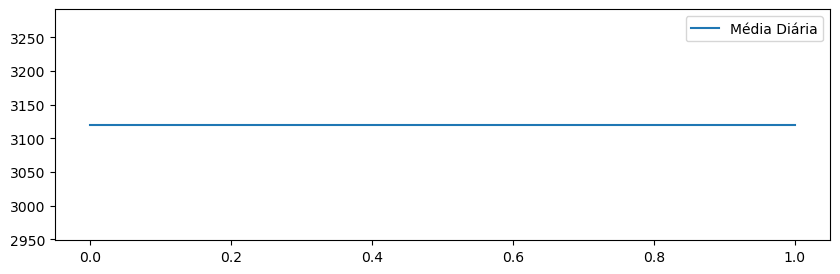

In [4]:
# Manipulação de tabelas
import openpyxl
from openpyxl import Workbook
from openpyxl.styles import numbers
import pandas as pd
# Criação de gráfico
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image
# Estilização de tabela
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment

travaPreco = 0
linhaPrecoAtual = 2
mediaAtual = 2
maximoAtual = 2
minimoAtual = 2
mediaDiariaAtual = 2
mediaDia = 0
primeiraVez = 1
lojaAtual = 2
seletorLoja = 1
melhorLoja = ""
qtdePreco = 0

# Selecionando o arquivo Excel com openpyxl
arq = openpyxl.load_workbook('produto.xlsx')
plan = arq.active
plan = arq['Sheet1']

#inserção do nome do produto

plan['A1'].value = infos[1]

# Inserção do valor atual

x = plan['B'+str(linhaPrecoAtual)].value

while (not x) == False:
    linhaPrecoAtual += 1
    x = plan['B'+str(linhaPrecoAtual)].value
    
plan['B'+str(linhaPrecoAtual)].value = precoAtual1
plan['B'+str(linhaPrecoAtual+1)].value = precoAtual2
plan['B'+str(linhaPrecoAtual+2)].value = precoAtual3
plan['B'+str(linhaPrecoAtual+3)].value = precoAtual4

qtdePreco = linhaPrecoAtual+3

arq.save('produto.xlsx')

# Selecionando o arquivo Excel com pandas
tabela = pd.read_excel("produto.xlsx")

#Cálculo das métricas

valorMedio = tabela["Valor Atual"].mean()
maiorValor = tabela["Valor Atual"].max()
menorValor = tabela["Valor Atual"].min()

tabela.to_excel("produto.xlsx", index=False)

# Selecionando o arquivo Excel com openpyxl
arq = openpyxl.load_workbook('produto.xlsx')
plan = arq.active

# Inserção do valor médio

x2 = plan['C'+str(mediaAtual)].value

while (not x2) == False:
    mediaAtual += 1
    x2 = plan['C'+str(mediaAtual)].value
    
plan['C'+str(mediaAtual)].value = valorMedio

# Inserção do maior valor

x3 = plan['D'+str(maximoAtual)].value

while (not x3) == False:
    maximoAtual += 1
    x3 = plan['D'+str(maximoAtual)].value
    
plan['D'+str(maximoAtual)].value = maiorValor

# Inserção do menor valor

x4 = plan['E'+str(minimoAtual)].value

while (not x4) == False:
    minimoAtual += 1
    x4 = plan['E'+str(minimoAtual)].value
    
plan['E'+str(minimoAtual)].value = menorValor

# Cálculo e inserção da média diária

x5 = plan['F'+str(mediaDiariaAtual)].value

while (not x5) == False:
        mediaDiariaAtual += 1
        x5 = plan['F'+str(mediaDiariaAtual)].value

for i in range(4):
        mediaDia += float(plan['B'+str(linhaPrecoAtual-i)].value)

plan['F'+str(mediaDiariaAtual)].value = mediaDia/4
    
# Verificação da loja com menor preço
    
linhaPrecoAtual = 2
    
x = plan['B'+str(linhaPrecoAtual)].value

while (not x) == False:
    if seletorLoja == 5:
        seletorLoja = 1
    if x == menorValor:
        match seletorLoja:
            case 1:
                melhorLoja = "Americanas"
            case 2:
                melhorLoja = "Kabum"
            case 3:
                melhorLoja = "Magazine Luiza"
            case 4:
                melhorLoja = "Mercado Livre"

    linhaPrecoAtual += 1
    x = plan['B'+str(linhaPrecoAtual)].value    
    seletorLoja += 1
    
    
# Inserção da melhor loja

x6 = plan['G'+str(lojaAtual)].value

while (not x4) == False:
    lojaAtual += 1
    x6 = plan['G'+str(lojaAtual)].value
    
plan['G'+str(lojaAtual)].value = melhorLoja
        
arq.save('produto.xlsx')

tabela = pd.read_excel("produto.xlsx")

# Criação do gráfico

y = tabela["Média Diária"]

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Média Diária"] = y

plt.figure(figsize=(10,3))
sns.lineplot(data=tabela_auxiliar)
plt.savefig('grafico.png', format='png')
plt.show()

# Formatação dos valores

tabela["Valor Atual"] = tabela["Valor Atual"].map("R${:.2f}".format)
tabela["Valor Médio"] = tabela["Valor Médio"].map("R${:.2f}".format)
tabela["Maior Valor"] = tabela["Maior Valor"].map("R${:.2f}".format)
tabela["Menor Valor"] = tabela["Menor Valor"].map("R${:.2f}".format)
tabela["Média Diária"] = tabela["Média Diária"].map("R${:.2f}".format)

tabela.to_excel("produtoFinal.xlsx", index=False)

# Inserindo gráfico na tabela

arq = openpyxl.load_workbook('produtoFinal.xlsx')
plan = arq.active
plan = arq['Sheet1']

img = openpyxl.drawing.image.Image('grafico.png')
  
img.anchor = 'H2'
plan.add_image(img)

# Formatação da tabela

for i in range(mediaAtual+1, qtdePreco+1):
    plan['C'+str(i)].value = ""
for i in range(mediaAtual+1, qtdePreco+1):
    plan['D'+str(i)].value = ""
for i in range(mediaAtual+1, qtdePreco+1):
    plan['E'+str(i)].value = ""
for i in range(mediaAtual+1, qtdePreco+1):
    plan['F'+str(i)].value = ""
    
# Estilização

def style_range(ws, cell_range, border=Border(), fill=None, font=None, alignment=None):

    top = Border(top=border.top)
    left = Border(left=border.left)
    right = Border(right=border.right)
    bottom = Border(bottom=border.bottom)

    first_cell = ws[cell_range.split(":")[0]]
    if alignment:
        ws.merge_cells(cell_range)
        first_cell.alignment = alignment

    rows = ws[cell_range]
    if font:
        first_cell.font = font

    for cell in rows[0]:
        cell.border = cell.border + top
    for cell in rows[-1]:
        cell.border = cell.border + bottom

    for row in rows:
        l = row[0]
        r = row[-1]
        l.border = l.border + left
        r.border = r.border + right
        if fill:
            for c in row:
                c.fill = fill

# Seleção do Estilo da tabela
thin = Side(border_style="thin", color="000000")
double = Side(border_style="double", color="000000")
border = Border(top=double, left=thin, right=thin, bottom=double)
fill = PatternFill("solid", fgColor="0070C0")
font = Font(b=True, color="FFFFFF")
al = Alignment(horizontal="center", vertical="center")

style_range(plan, 'A1:A1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'B1:B1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'C1:C1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'D1:D1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'E1:E1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'F1:F1', border=border, fill=fill, font=font, alignment=al)
style_range(plan, 'G1:G1', border=border, fill=fill, font=font, alignment=al)

# Alteração da largura das colunas
for columns in plan['A1:G1']:
    for col in columns: 
        plan.column_dimensions[col.column_letter].width = 12

arq.save("produtoFinal.xlsx")

# Envio do email com tabela

In [5]:
# Configurando as informações necessárias para enviar o email
if menorValor <= float(infos[2]):
    SMTPserver = 'smtp.gmail.com'
    remetente =     'thiagokraide2002@gmail.com'
    destinatario = infos[0]
    USUARIO = "thiagokraide2002@gmail.com"
    SENHA = "qvukanasteigzbfq"

    tipo_texto = 'html'

    mensagem = f"""
        <p>Olá,</p>
        <p>Seu produto: <b>{infos[1]}</b> que tanto desejava, chegou ao valor de <b>R${menorValor}</b>!</p>
        <p>Loja: {melhorLoja}.</p>
        <p>Abra a planilha <u>precoFinal.xlsx</u> em seu computador e veja todos os detalhes do histórico de preços.</p>
        """

    assunto="Seu produto chegou ao valor desejado!"

    import sys
    import os
    import re

    # Essa biblioteca usa o protocolo SMTP seguro (porta 465, usa SSL)
    from smtplib import SMTP_SSL as SMTP       
    from email.mime.text import MIMEText

    # Enviando o email
    try:
        msg = MIMEText(mensagem, tipo_texto)
        msg['Subject'] = assunto
        msg['From'] = remetente

        conn = SMTP(SMTPserver)
        conn.set_debuglevel(False)
        conn.login(USUARIO, SENHA)
        try:
            conn.sendmail(remetente, destinatario, msg.as_string())
        finally:
            conn.quit()
            print("email enviado")

    except:
        sys.exit("email falhou; %s" % "CUSTOM_ERROR")


email enviado


# Criação da janela de finalização

In [6]:
fim = Tk()

# Configuração das características da janela
fim.title("Finalização")
fim.geometry("500x220")

fim.bind('<Return>', (lambda event, e = ents: fetch(e)))

#Inserção dos Textos
quadro = Frame(fim)
texto1 = Label(quadro, text="Busca finalizada e planilha atualizada com sucesso!", anchor='w', font="Helvetica 10 bold", fg="green")
texto2 = Label(quadro, text="Verifique o seu email: " + infos[0], anchor='w', font="Helvetica 10 bold", fg="black")
texto3 = Label(quadro, text="Seu produto: " + infos[1] + " que tanto desejava, chegou ao valor de R$" + str(menorValor), anchor='w', font="Helvetica 10 bold", fg="black")
botao = Button(fim, text="Ok", command=fim.destroy, 
        padx = 15, pady = 5, bd = 0, bg = "#4A8DF8", fg="white", activebackground="#4A8DF8", activeforeground="white", cursor="hand2")


quadro.pack()
texto1.pack(pady=25)
if menorValor <= float(infos[2]): 
    texto2.pack(pady=10)
    texto3.pack(pady=10)
    
botao.pack(pady=20)

fim.mainloop()